# Finding Factors Responsible for Spread of COVID-19
-By Kartikeya

LinkedIn: https://www.linkedin.com/in/kartikeya-595840181/
                  

### STEP 1: Let's Import the modules 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### STEP 2: Importing Dataset
Importing "Covid19_Confirmed_dataset.csv" from "./Dataset" folder. 


In [2]:
covid_data=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
covid_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,39186,39192,39227,39233,39254,39268,39285,39290,39297,39341
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,13045,13153,13259,13391,13518,13649,13806,13965,14117,14266
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,50754,50914,51067,51213,51368,51530,51690,51847,51995,52136
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1836,1836,1836,1966,1966,2050,2050,2110,2110,2110
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,4590,4672,4718,4797,4905,4972,5114,5211,5370,5402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,37963,38253,38703,39121,39541,39899,40322,40766,41078,41498
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2029,2030,2030,2031,2031,2034,2039,2040,2041,2041
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,14515,14612,14641,14660,14715,14759,14802,14830,14974,15052


In [3]:
covid_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,39186,39192,39227,39233,39254,39268,39285,39290,39297,39341
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,13045,13153,13259,13391,13518,13649,13806,13965,14117,14266
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,50754,50914,51067,51213,51368,51530,51690,51847,51995,52136
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1836,1836,1836,1966,1966,2050,2050,2110,2110,2110
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,4590,4672,4718,4797,4905,4972,5114,5211,5370,5402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,37963,38253,38703,39121,39541,39899,40322,40766,41078,41498
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2029,2030,2030,2031,2031,2034,2039,2040,2041,2041
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,14515,14612,14641,14660,14715,14759,14802,14830,14974,15052


#### Let's check the shape of the dataframe

In [4]:
covid_data.shape

(266, 261)


### STEP 3 : Data Cleaning(Deleting Useless columns)

In [5]:
covid_data.drop(["Lat","Long"],axis=1,inplace=True)

In [6]:
covid_data.head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,39186,39192,39227,39233,39254,39268,39285,39290,39297,39341
1,NaN,Albania,0,0,0,0,0,0,0,0,...,13045,13153,13259,13391,13518,13649,13806,13965,14117,14266
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,50754,50914,51067,51213,51368,51530,51690,51847,51995,52136
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,1836,1836,1836,1966,1966,2050,2050,2110,2110,2110
4,NaN,Angola,0,0,0,0,0,0,0,0,...,4590,4672,4718,4797,4905,4972,5114,5211,5370,5402
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,98,98,101,101,101,101,101,106,107,107
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,691235,702484,711325,723132,736609,751001,765002,779689,790818,798486
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,48643,49072,49400,49574,49901,50359,50850,51382,51925,52496
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,4218,4218,4218,4220,4224,4227,4231,4232,4234,4235


### STEP 4  : Aggregating the rows by the country

In [7]:
covid_country=covid_data.groupby("Country/Region").sum()

In [8]:
covid_country

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,39186,39192,39227,39233,39254,39268,39285,39290,39297,39341
Albania,0,0,0,0,0,0,0,0,0,0,...,13045,13153,13259,13391,13518,13649,13806,13965,14117,14266
Algeria,0,0,0,0,0,0,0,0,0,0,...,50754,50914,51067,51213,51368,51530,51690,51847,51995,52136
Andorra,0,0,0,0,0,0,0,0,0,0,...,1836,1836,1836,1966,1966,2050,2050,2110,2110,2110
Angola,0,0,0,0,0,0,0,0,0,0,...,4590,4672,4718,4797,4905,4972,5114,5211,5370,5402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,37963,38253,38703,39121,39541,39899,40322,40766,41078,41498
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
Yemen,0,0,0,0,0,0,0,0,0,0,...,2029,2030,2030,2031,2031,2034,2039,2040,2041,2041


In [9]:
covid_country.shape

(188, 257)

In [10]:
covid_country.loc["India"]

1/22/20          0
1/23/20          0
1/24/20          0
1/25/20          0
1/26/20          0
            ...   
9/30/20    6312584
10/1/20    6394068
10/2/20    6473544
10/3/20    6549373
10/4/20    6623815
Name: India, Length: 257, dtype: int64

In [11]:
#covid_country.index

In [12]:
covid_country_transposed = covid_country.T
covid_country_transposed.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0


In [13]:
covid_country_transposed.describe()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
count,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,...,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000
mean,17768.715953,3322.400778,16143.416342,712.501946,851.062257,42.933852,136590.754864,18017.844358,10298.883268,15957.470817,...,199928.591440,808.536965,13766.957198,14341.206226,416.412451,7500.704280,6.190661,778.782101,3551.284047,1871.968872
std,16884.948356,4172.023229,17852.151399,507.697238,1381.686510,38.241721,213066.637933,18856.448876,9373.538206,11564.451564,...,143803.688933,621.068937,18145.628900,22569.410867,363.686658,11714.897543,4.249843,841.658727,5047.082249,2795.301043
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.000000,174.000000,367.000000,224.000000,4.000000,7.000000,502.000000,290.000000,2810.000000,6909.000000,...,20970.000000,238.000000,75.000000,107.000000,153.000000,84.000000,0.000000,0.000000,16.000000,3.000000
50%,13659.000000,1099.000000,9134.000000,764.000000,81.000000,25.000000,15419.000000,8676.000000,7184.000000,16655.000000,...,255362.000000,816.000000,3468.000000,1370.000000,328.000000,446.000000,9.000000,283.000000,1057.000000,149.000000
75%,36710.000000,5396.000000,30950.000000,925.000000,1164.000000,91.000000,196543.000000,38841.000000,17895.000000,21212.000000,...,305562.000000,1278.000000,24783.000000,19443.000000,590.000000,12160.000000,10.000000,1730.000000,6228.000000,3659.000000
max,39341.000000,14266.000000,52136.000000,2110.000000,5402.000000,107.000000,798486.000000,52496.000000,27148.000000,48146.000000,...,505619.000000,2145.000000,58612.000000,78434.000000,1096.000000,41498.000000,10.000000,2041.000000,15052.000000,7888.000000


### STEP 5: Visualizing Data (from country perspective eg: China)
visualization always helps for better understanding of our data.

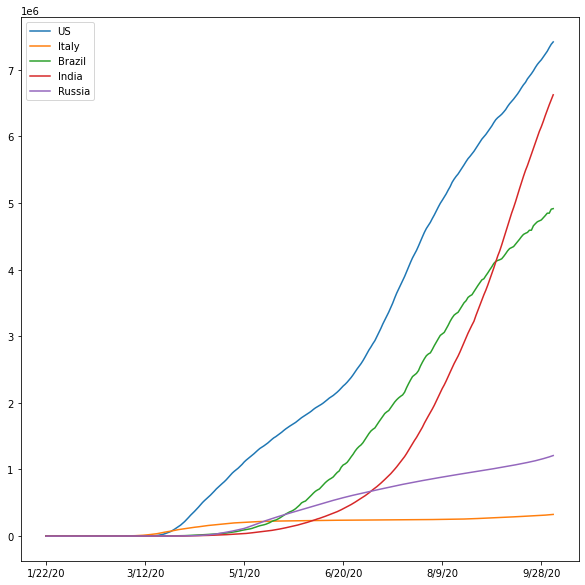

In [14]:
plt.figure(figsize=(10,10))
covid_country.loc["US"].plot()
covid_country.loc["Italy"].plot()
covid_country.loc["Brazil"].plot()
covid_country.loc["India"].plot()
covid_country.loc["Russia"].plot()

plt.legend()

### STEP 6: Calculating a Good Measure 
We need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

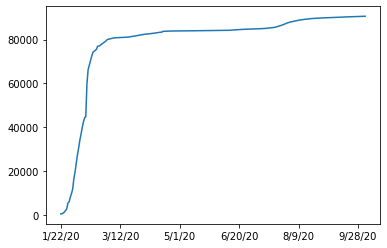

In [15]:
covid_country.loc['China'].plot()

### STEP 7: Calculating the first derivative of the curve

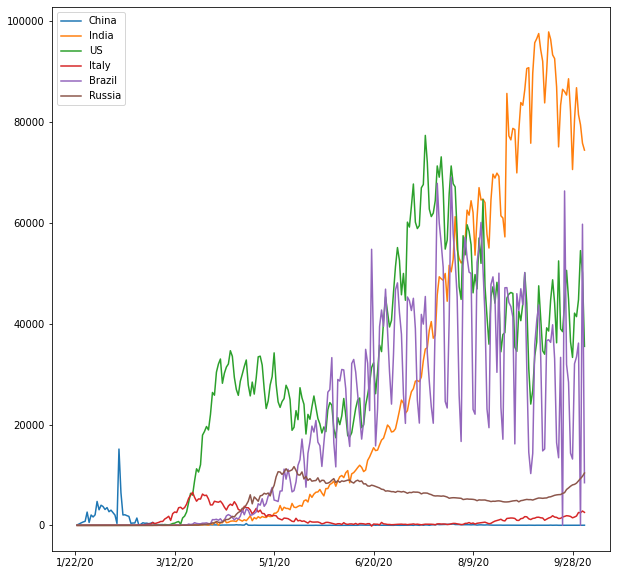

In [16]:
plt.figure(figsize=(10,10))

covid_country.loc["China"].diff().plot()
covid_country.loc["India"].diff().plot()
covid_country.loc["US"].diff().plot()
covid_country.loc["Italy"].diff().plot()
covid_country.loc["Brazil"].diff().plot()
covid_country.loc["Russia"].diff().plot()
plt.legend()

### STEP 8: Finding the Maximum infection Rate for China

In [17]:
covid_country.loc["China"].diff().max()

15136.0

In [18]:
covid_country.loc["US"].diff().max()

77362.0

In [19]:
covid_country.loc["India"].diff().max()

97894.0

### STEP 9: Finding Maximum infection rate for all of the Countries. 

In [20]:
countries=list(covid_country.index)
max_infection_rates=[]
for c in countries:
    max_infection_rates.append(covid_country.loc[c].diff().max())
covid_country["max_infection_rate"]=max_infection_rates

In [21]:
covid_country.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,39192,39227,39233,39254,39268,39285,39290,39297,39341,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,13153,13259,13391,13518,13649,13806,13965,14117,14266,178.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,50914,51067,51213,51368,51530,51690,51847,51995,52136,675.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,1836,1836,1966,1966,2050,2050,2110,2110,2110,130.0
Angola,0,0,0,0,0,0,0,0,0,0,...,4672,4718,4797,4905,4972,5114,5211,5370,5402,159.0


### STEP 10: Creating a new dataframe with only needed column 

In [22]:
covid_max=pd.DataFrame(covid_country["max_infection_rate"])

In [23]:
covid_max.head()

,max_infection_rate
Country/Region,
Afghanistan,915.0
Albania,178.0
Algeria,675.0
Andorra,130.0
Angola,159.0


### STEP 11: 
- Importing the WorldHappinessReport.csv dataset
- Selecting needed columns for our analysis 
- Join the datasets 
- Calculating the correlations as the result of our analysis

### STEP 11.1 : Importing the Second dataset

https://www.kaggle.com/londeen/world-happiness-report-2020

In [24]:
whr20=pd.read_csv("WHR20.csv")

In [25]:
whr20.head(3)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267


### STEP 11.2: Data cleaningof second data set(Dropping useless columns)

In [26]:
whr20=whr20[["Country name","Logged GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices"]]

In [27]:
whr20.head()

,Country name,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,10.639267,0.954330,71.900825,0.949172
1,Denmark,10.774001,0.955991,72.402504,0.951444
2,Switzerland,10.979933,0.942847,74.102448,0.921337
3,Iceland,10.772559,0.974670,73.000000,0.948892
4,Norway,11.087804,0.952487,73.200783,0.955750


### STEP 11.3: Changing the indices of the dataframe

In [28]:
whr20.set_index("Country name",inplace=True)
whr20.head()

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country name,,,,
Finland,10.639267,0.954330,71.900825,0.949172
Denmark,10.774001,0.955991,72.402504,0.951444
Switzerland,10.979933,0.942847,74.102448,0.921337
Iceland,10.772559,0.974670,73.000000,0.948892
Norway,11.087804,0.952487,73.200783,0.955750


### STEP 13: Joining both the Datasets 

#### Corona Dataset :

In [29]:
covid_max.head()

,max_infection_rate
Country/Region,
Afghanistan,915.0
Albania,178.0
Algeria,675.0
Andorra,130.0
Angola,159.0


In [30]:
covid_max.shape

(188, 1)

#### Wolrd Happiness Report Dataset :

In [31]:
whr20.head()

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country name,,,,
Finland,10.639267,0.954330,71.900825,0.949172
Denmark,10.774001,0.955991,72.402504,0.951444
Switzerland,10.979933,0.942847,74.102448,0.921337
Iceland,10.772559,0.974670,73.000000,0.948892
Norway,11.087804,0.952487,73.200783,0.955750


In [32]:
whr20.shape

(153, 4)

In [33]:
data=covid_max.join(whr20,how="inner")
data.head()

,max_infection_rate,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,7.462861,0.470367,52.590000,0.396573
Albania,178.0,9.417931,0.671070,68.708138,0.781994
Algeria,675.0,9.537965,0.803385,65.905174,0.466611
Argentina,14687.0,9.810955,0.900568,68.803802,0.831132
Armenia,771.0,9.100476,0.757479,66.750656,0.712018


https://data.worldbank.org/indicator/EN.POP.DNST

In [34]:
population_den=pd.read_csv("population_density.csv")
population_den.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,307.988889,312.361111,314.972222,316.844444,318.666667,...,564.827778,566.922222,569.777778,573.105556,576.522222,579.672222,582.622222,585.366667,588.027778,NaN
1,Afghanistan,AFG,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,14.044987,14.323808,14.617537,14.926295,15.250314,...,44.704082,46.131503,47.730564,49.428038,51.114778,52.712071,54.197114,55.595993,56.937760,NaN
2,Angola,AGO,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,4.436891,4.498708,4.555593,4.600180,4.628676,...,18.734456,19.427818,20.139513,20.867715,21.610475,22.366553,23.135064,23.916538,24.713052,NaN


In [35]:
population_den.set_index("Country Name",inplace=True)
population_den=population_den["2018"]
population_den

Country Name
Aruba           588.027778
Afghanistan      56.937760
Angola           24.713052
Albania         104.612263
Andorra         163.842553
                   ...    
Kosovo                 NaN
Yemen, Rep.      53.977853
South Africa     47.630120
Zambia           23.341479
Zimbabwe         37.324591
Name: 2018, Length: 264, dtype: float64

In [36]:
data2=covid_max.join(population_den,how="inner")
data2.rename(columns = {'2018':'Population Density in 2018'}, inplace = True) 
data2.head()

,max_infection_rate,Population Density in 2018
Afghanistan,915.0,56.937760
Albania,178.0,104.612263
Algeria,675.0,17.730075
Andorra,130.0,163.842553
Angola,159.0,24.713052


In [37]:
data2.shape

(162, 2)

In [38]:
data_all=data2.join(whr20,how="inner")

data_all.head()

,max_infection_rate,Population Density in 2018,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,56.937760,7.462861,0.470367,52.590000,0.396573
Albania,178.0,104.612263,9.417931,0.671070,68.708138,0.781994
Algeria,675.0,17.730075,9.537965,0.803385,65.905174,0.466611
Argentina,14687.0,16.258510,9.810955,0.900568,68.803802,0.831132
Armenia,771.0,103.680225,9.100476,0.757479,66.750656,0.712018


In [39]:
data_all.shape

(130, 6)

In [40]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, Afghanistan to Zimbabwe
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   max_infection_rate            130 non-null    float64
 1   Population Density in 2018    128 non-null    float64
 2   Logged GDP per capita         130 non-null    float64
 3   Social support                130 non-null    float64
 4   Healthy life expectancy       130 non-null    float64
 5   Freedom to make life choices  130 non-null    float64
dtypes: float64(6)
memory usage: 7.1+ KB


### STEP 13: Preparing Correlation matrix for Merged Datasets

In [41]:
data_all.corr()

,max_infection_rate,Population Density in 2018,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,-0.014522,0.101684,0.030225,0.096390,0.086710
Population Density in 2018,-0.014522,1.000000,0.171219,0.076463,0.195976,0.153290
Logged GDP per capita,0.101684,0.171219,1.000000,0.809546,0.857715,0.458093
Social support,0.030225,0.076463,0.809546,1.000000,0.769509,0.504912
Healthy life expectancy,0.096390,0.195976,0.857715,0.769509,1.000000,0.490678
Freedom to make life choices,0.086710,0.153290,0.458093,0.504912,0.490678,1.000000


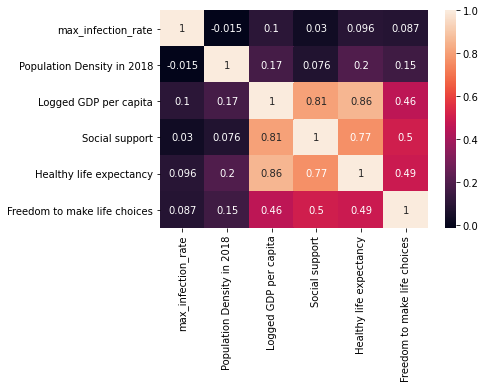

In [42]:
sns.heatmap(data_all.corr(),annot=True)

### STEP 14: Visualization of the results
our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

### STEP 14.1: Plotting Population Density vs maximum Infection rate

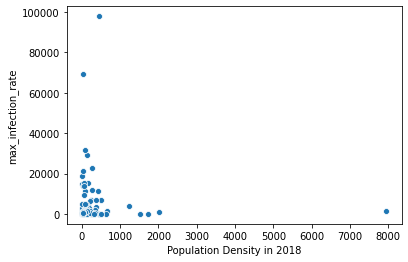

In [43]:
x=data_all["Population Density in 2018"]
y=data_all["max_infection_rate"]
sns.scatterplot(x,y)

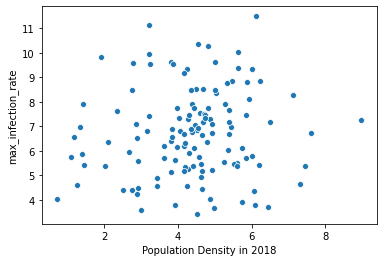

In [44]:
sns.scatterplot(np.log(x),np.log(y))

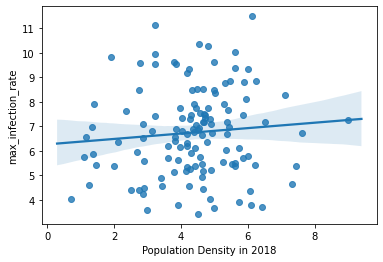

In [45]:
sns.regplot(np.log(x),np.log(y))

### STEP 14.2: Plotting GDP vs maximum Infection rate

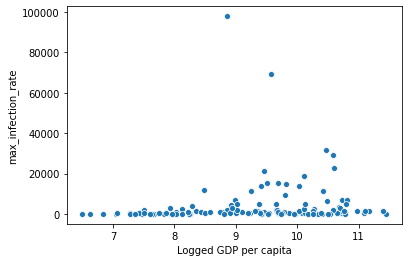

In [46]:
x1=data_all["Logged GDP per capita"]
sns.scatterplot(x1,y)

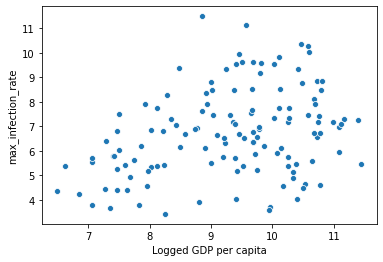

In [47]:
sns.scatterplot(x1,np.log(y))

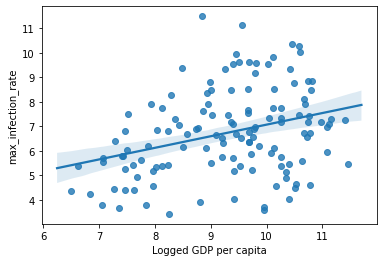

In [48]:
sns.regplot(x1,np.log(y))

###  STEP 14.3:Plotting Social support vs maximum Infection rate

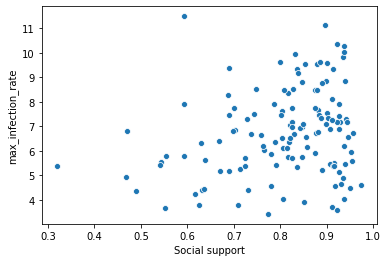

In [49]:
x2=data_all["Social support"]
sns.scatterplot(x2,np.log(y))

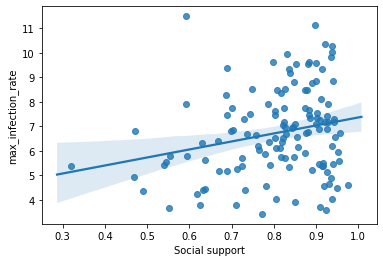

In [50]:
sns.regplot(x2,np.log(y))

### STEP 14.4: Plotting Healthy life expectancy vs maximum Infection rate

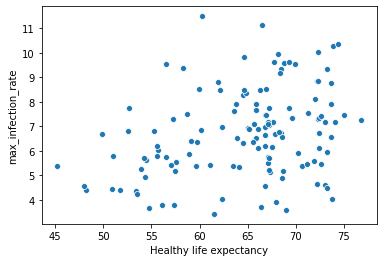

In [51]:
x3=data_all["Healthy life expectancy"]
sns.scatterplot(x3,np.log(y))

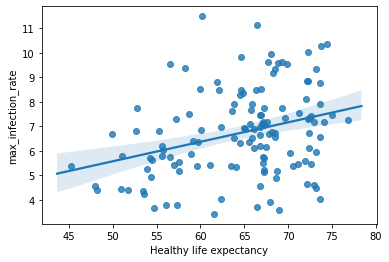

In [52]:
sns.regplot(x3,np.log(y))

### STEP 14.5: Plotting Freedom to make life choices vs maximum Infection rate

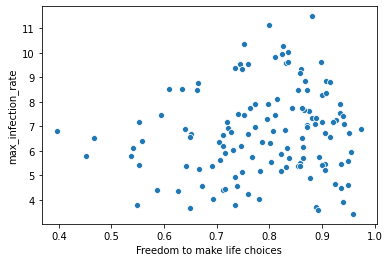

In [53]:
x4=data_all["Freedom to make life choices"]
sns.scatterplot(x4,np.log(y))

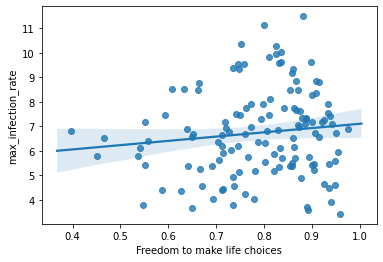

In [54]:
sns.regplot(x4,np.log(y))

# 

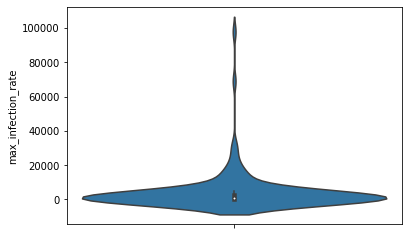

In [55]:
sns.violinplot(y='max_infection_rate',data=data_all)

# STEP 15:DESCRIPTIVE STATISTICS

In [56]:
covid_country_transposed.diff()["India"].describe()

count      256.000000
mean     25874.277344
std      32198.334285
min          0.000000
25%         96.500000
50%       7933.000000
75%      52830.250000
max      97894.000000
Name: India, dtype: float64

In [57]:
covid_country.diff(axis=1).drop("max_infection_rate",axis=1)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,6.0,35.0,6.0,21.0,14.0,17.0,5.0,7.0,44.0
Albania,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,124.0,108.0,106.0,132.0,127.0,131.0,157.0,159.0,152.0,149.0
Algeria,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,175.0,160.0,153.0,146.0,155.0,162.0,160.0,157.0,148.0,141.0
Andorra,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,83.0,0.0,0.0,130.0,0.0,84.0,0.0,60.0,0.0,0.0
Angola,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,115.0,82.0,46.0,79.0,108.0,67.0,142.0,97.0,159.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,372.0,290.0,450.0,418.0,420.0,358.0,423.0,444.0,312.0,420.0
Western Sahara,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yemen,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,3.0,5.0,1.0,1.0,0.0


In [58]:
total_case=covid_country.iloc[:,-2:-1]
total_case.rename(columns = {total_case.columns[0]:'Total Cases'}, inplace = True)
total_case.head()

,Total Cases
Country/Region,
Afghanistan,39341
Albania,14266
Algeria,52136
Andorra,2110
Angola,5402


In [59]:
daily_case=covid_country.diff(axis=1).iloc[:,-2:-1]
daily_case.rename(columns = {daily_case.columns[0]:'Daily New Cases'}, inplace = True)
daily_case.head()

,Daily New Cases
Country/Region,
Afghanistan,44.0
Albania,149.0
Algeria,141.0
Andorra,0.0
Angola,32.0


In [60]:
top10_total_cases=total_case.sort_values("Total Cases",ascending=False)[0:10]
top10_total_cases

,Total Cases
Country/Region,
US,7417845
India,6623815
Brazil,4915289
Russia,1209039
Colombia,855052
Peru,821564
Argentina,798486
Spain,789932
Mexico,761665


In [61]:
top10_daily_cases=daily_case.sort_values("Daily New Cases",ascending=False)[0:10]
top10_daily_cases

,Daily New Cases
Country/Region,
India,74442.0
US,35504.0
United Kingdom,22965.0
Russia,10376.0
Brazil,8456.0
Argentina,7668.0
Colombia,6905.0
Ukraine,4263.0
Netherlands,4032.0


In [62]:
top10_max_cases=covid_max.sort_values("max_infection_rate",ascending=False)[0:10]
top10_max_cases

,max_infection_rate
Country/Region,
India,97894.0
US,77362.0
Brazil,69074.0
Spain,31785.0
France,29237.0
United Kingdom,22965.0
Peru,21358.0
Kazakhstan,18757.0
Colombia,15318.0


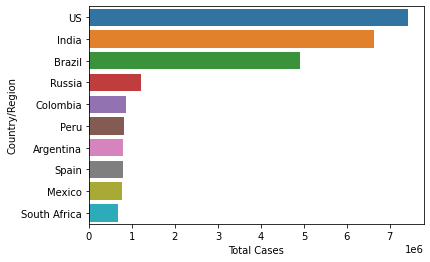

In [63]:
#bar chart
sns.barplot(x='Total Cases',y=top10_total_cases.index,data=top10_total_cases)

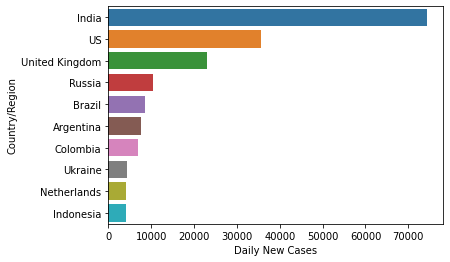

In [64]:
#bar chart
sns.barplot(x='Daily New Cases',y=top10_daily_cases.index,data=top10_daily_cases)

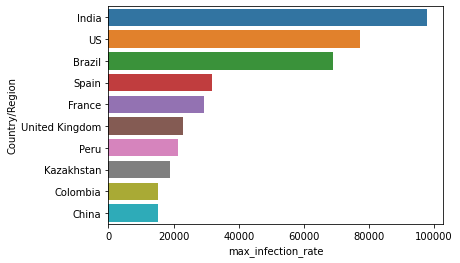

In [65]:
#bar chart
sns.barplot(x='max_infection_rate',y=top10_max_cases.index,data=top10_max_cases)

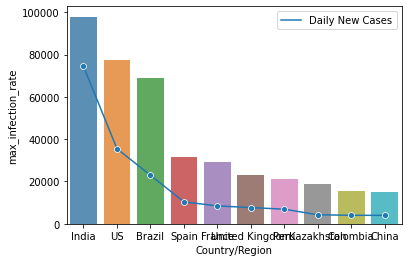

In [66]:
sns.lineplot(data = top10_daily_cases, marker='o', sort = False)
sns.barplot(data = top10_max_cases, x=top10_max_cases.index, y='max_infection_rate', alpha=0.8)

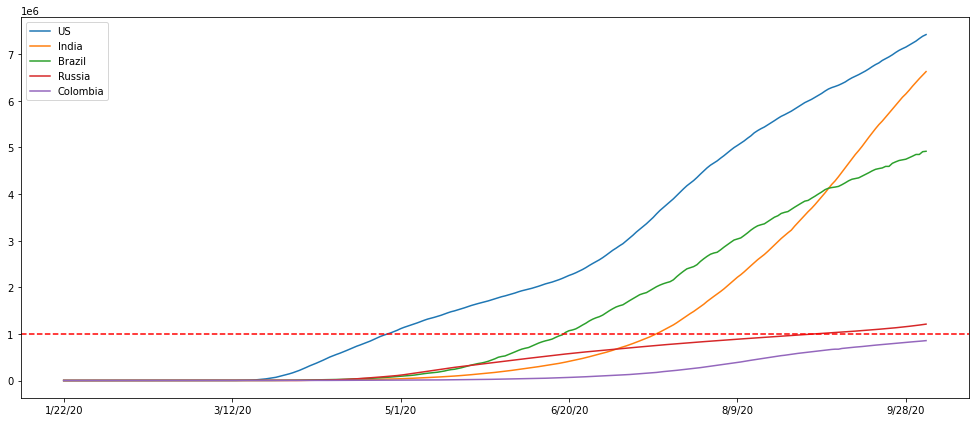

In [67]:
plt.figure(figsize=(17,7))
for r in top10_total_cases.index[0:5]:
    covid_country_transposed[r].plot()
    plt.legend()
plt.axhline(y=10**6, color='r', linestyle='--')

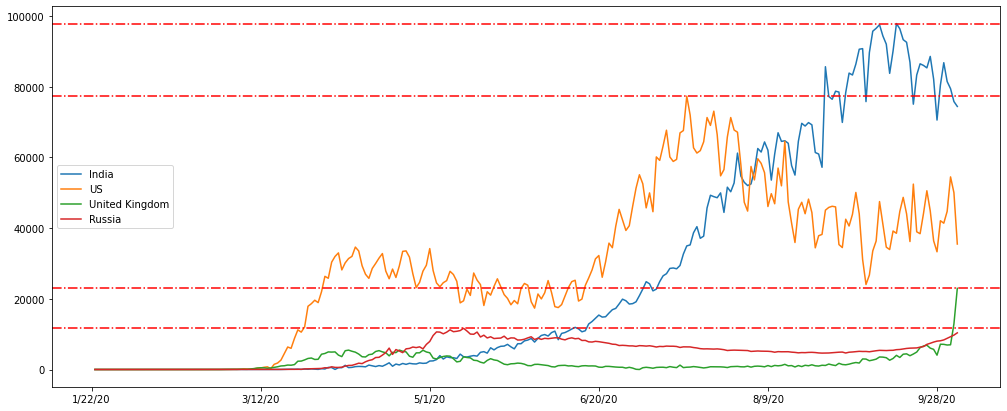

In [68]:
plt.figure(figsize=(17,7))
for r in top10_daily_cases.index[0:4]:
    covid_country_transposed.diff()[r].plot()
    plt.axhline(y=covid_country_transposed.diff()[r].max(), color='r', linestyle='dashdot')
    plt.legend()

In [69]:
def COVID_MONITOR():
    try:
        c_name=input("Enter Country Name:").title()
        print("Total cases till date   = ",covid_country_transposed[c_name].max())
        print("Peak of per day cases   = ",covid_country_transposed[c_name].diff().max())
        print("Current daily new cases = ",covid_country_transposed[c_name].diff().iloc[-1])
    except:
        print("Please Enter Correct Country Name")
        c_name_show=input("To view name of countries in the list enter 'y' else enter 'n' : ")
        if c_name_show.lower()=="y":   
            for i in covid_country.index: 
                print(i, end =" | ")
        COVID_MONITOR()

In [70]:
COVID_MONITOR()


Enter Country Name:india
Total cases till date   =  6623815
Peak of per day cases   =  97894.0
Current daily new cases =  74442.0


# Preparing The Data Before Applying Facebook Prophet Tool

In [71]:
India_covid=covid_country_transposed.diff()["India"]
India_covid=pd.DataFrame(India_covid)
India_covid

,India
1/22/20,NaN
1/23/20,0.0
1/24/20,0.0
1/25/20,0.0
1/26/20,0.0
...,...
9/30/20,86821.0
10/1/20,81484.0
10/2/20,79476.0
10/3/20,75829.0


In [72]:
India_covid["ds"]=India_covid.index
India_covid.rename(columns={'India':'y'},inplace=True)
India_covid

,y,ds
1/22/20,NaN,1/22/20
1/23/20,0.0,1/23/20
1/24/20,0.0,1/24/20
1/25/20,0.0,1/25/20
1/26/20,0.0,1/26/20
...,...,...
9/30/20,86821.0,9/30/20
10/1/20,81484.0,10/1/20
10/2/20,79476.0,10/2/20
10/3/20,75829.0,10/3/20


In [73]:
India_covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257 entries, 1/22/20 to 10/4/20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       256 non-null    float64
 1   ds      257 non-null    object 
dtypes: float64(1), object(1)
memory usage: 16.0+ KB


In [74]:
India_covid.dropna(inplace=True)
India_covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 1/23/20 to 10/4/20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       256 non-null    float64
 1   ds      256 non-null    object 
dtypes: float64(1), object(1)
memory usage: 6.0+ KB


In [75]:
from fbprophet import Prophet
m=Prophet()
m.fit(India_covid)

Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\hp\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


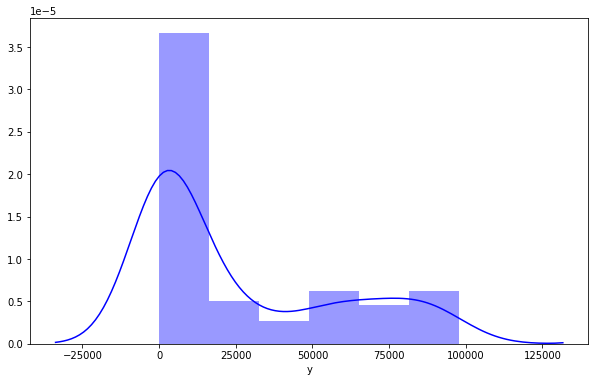

In [76]:
plt.figure(figsize=(10,6))
sns.distplot(India_covid['y'],color='b')

# STEP 16:Forcasting into the future

In [77]:

future=m.make_future_dataframe(periods=60)
forecast=m.predict(future)

In [78]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-23,-823.248333,-5746.550556,5968.505564,-823.248333,-823.248333,938.417571,938.417571,938.417571,938.417571,938.417571,938.417571,0.0,0.0,0.0,115.169239
1,2020-01-24,-803.588702,-5533.524892,6581.236469,-803.588702,-803.588702,880.102536,880.102536,880.102536,880.102536,880.102536,880.102536,0.0,0.0,0.0,76.513833
2,2020-01-25,-783.929072,-5492.568200,6361.280955,-783.929072,-783.929072,773.446055,773.446055,773.446055,773.446055,773.446055,773.446055,0.0,0.0,0.0,-10.483017
3,2020-01-26,-764.269442,-6817.209840,4899.902059,-764.269442,-764.269442,-401.356927,-401.356927,-401.356927,-401.356927,-401.356927,-401.356927,0.0,0.0,0.0,-1165.626369
4,2020-01-27,-744.609812,-8855.354030,2587.730600,-744.609812,-744.609812,-2558.272769,-2558.272769,-2558.272769,-2558.272769,-2558.272769,-2558.272769,0.0,0.0,0.0,-3302.882580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,2020-11-29,128843.181562,119263.902262,137377.498551,121924.051320,135222.027114,-401.356927,-401.356927,-401.356927,-401.356927,-401.356927,-401.356927,0.0,0.0,0.0,128441.824635
312,2020-11-30,129450.310340,117763.869772,135904.124128,122368.290313,136042.682253,-2558.272769,-2558.272769,-2558.272769,-2558.272769,-2558.272769,-2558.272769,0.0,0.0,0.0,126892.037572
313,2020-12-01,130057.439119,119849.119026,138083.528007,122765.373456,136800.715944,-883.364831,-883.364831,-883.364831,-883.364831,-883.364831,-883.364831,0.0,0.0,0.0,129174.074288
314,2020-12-02,130664.567898,121510.091953,141089.260162,123164.732675,137594.066444,1251.028365,1251.028365,1251.028365,1251.028365,1251.028365,1251.028365,0.0,0.0,0.0,131915.596263


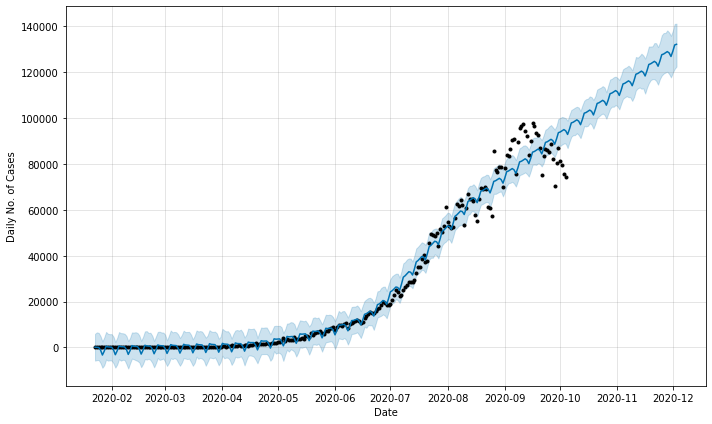

In [79]:
figure=m.plot(forecast,xlabel='Date',ylabel='Daily No. of Cases')

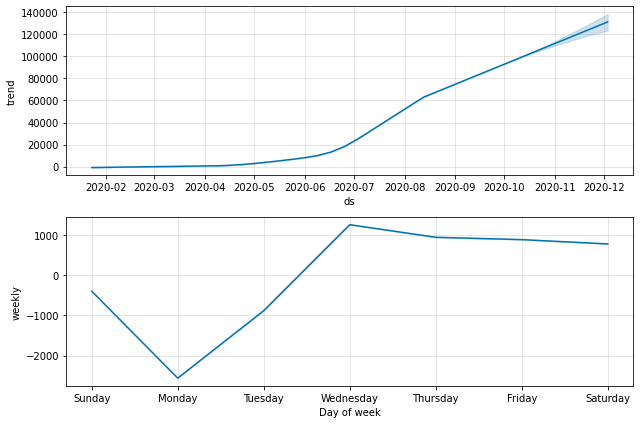

In [80]:
figure2=m.plot_components(forecast)